# 01 - Exploratory Data Analysis (Full HDFS-v1)

This notebook analyzes the complete HDFS v1 dataset, focusing on event frequencies and temporal distributions.

### Objectives:
1. **Analyze Activity Level**: How many logs are generated per block?
2. **Temporal Distribution**: Analyze the duration of each block session.
3. **Class Balance**: Understand the rarity of anomalies.

In [1]:
import pandas as pd # Data processing library
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns # Advanced visualization
import os # Path management

# Set the visual style for all plots
sns.set_theme(style="whitegrid")

# Path to the feature matrix generated in the preprocessing step
data_path = '../data/X_features.csv'

# Check if the data file exists to avoid NameErrors in subsequent cells
if os.path.exists(data_path):
    # Load the dataset using the first column as index (BlockId)
    df = pd.read_csv(data_path, index_col=0)
    print(f'Full dataset loaded: {len(df)} block sessions indexed.')
else:
    # Raise an error if the file is missing to stop the notebook execution early
    raise FileNotFoundError(f'Error: {data_path} not found. Please run the preprocessing script first.')

Full dataset loaded: 575061 block sessions indexed.


## 1. Class Balance

Cybersecurity datasets are typically imbalanced. We verify the ratio of `Normal` vs `Anomaly`.

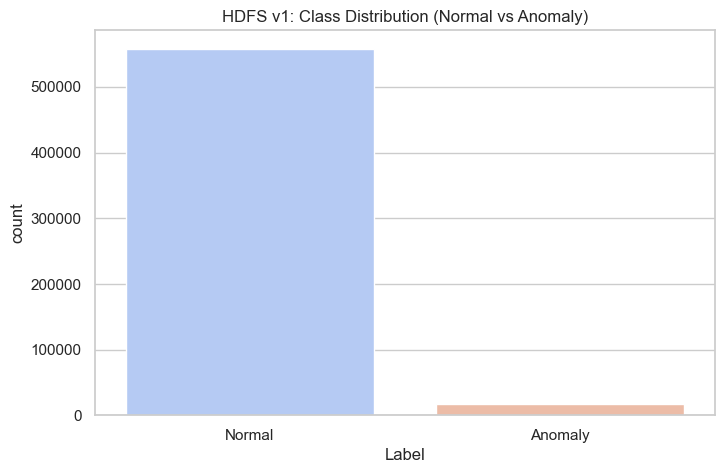

Percentage of Anomalies in the Dataset:
Label
Normal     97.071963
Anomaly     2.928037
Name: proportion, dtype: float64


In [2]:
# 1.1 Visualize the distribution of Normal vs Anomaly labels
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', palette='coolwarm', hue='Label', legend=False)
plt.title('HDFS v1: Class Distribution (Normal vs Anomaly)')
plt.show()

# 1.2 Display exact percentages for the report
print('Percentage of Anomalies in the Dataset:')
print(df['Label'].value_counts(normalize=True) * 100)

## 2. Temporal Analysis: Session Duration

We check if the time taken for a block's operations (duration) is a good indicator of abnormality.

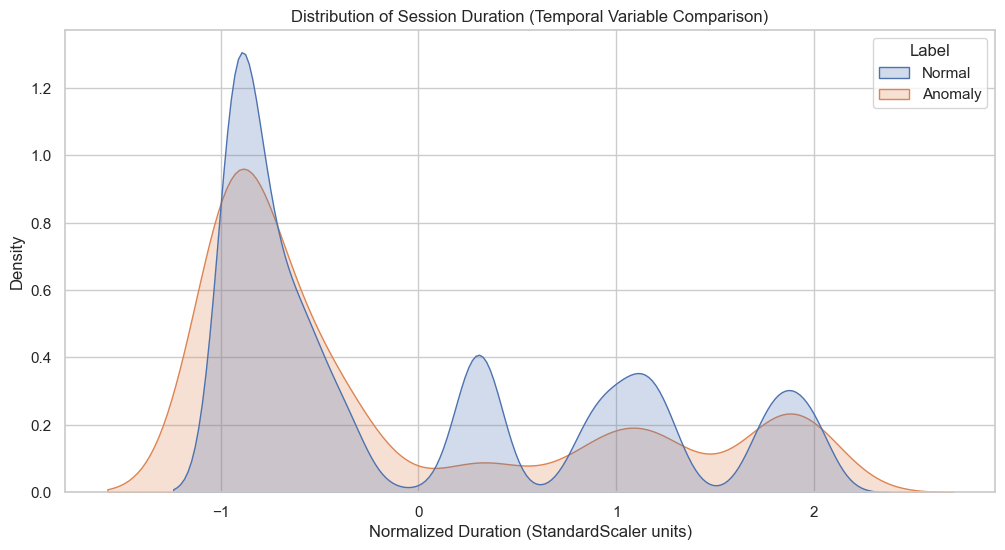

In [3]:
# 2.1 Check if the temporal feature 'SessionDuration' exists after preprocessing
if 'SessionDuration' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # We sample a portion of the data (up to 100k) to speed up KDE plot calculation
    # while maintaining a representative distribution.
    sample_df = df.sample(min(100000, len(df)), random_state=42)
    
    # Kernel Density Estimate (KDE) plot to compare distributions
    sns.kdeplot(data=sample_df, x='SessionDuration', hue='Label', fill=True, common_norm=False)
    
    plt.title('Distribution of Session Duration (Temporal Variable Comparison)')
    plt.xlabel('Normalized Duration (StandardScaler units)')
    plt.ylabel('Density')
    plt.show()
else:
    print("Warning: 'SessionDuration' column not found in the dataset.")